In [ ]:
# Install some custom fonts to use in the charts.
!apt install fonts-open-sans
!apt install ttf-ubuntu-font-family

In [ ]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
leagues = {
    'eng': {
        'title': 'Premier League',
        'url_fmt': 'https://www.worldfootball.net/schedule/eng-premier-league-{}-{}-spieltag/38/',
        'top_slice': slice(None, 6),
        'mid_slice': slice(7, 12),
        'bot_slice': slice(13, None),
    },
    'fra': {
        'title': 'Ligue 1',
        'url_fmt': 'https://www.worldfootball.net/schedule/fra-ligue-1-{}-{}-spieltag/38/',
        'skip': 2019,
        'top_slice': slice(None, 6),
        'mid_slice': slice(7, 12),
        'bot_slice': slice(13, None),
    },
    'esp': {
        'title': 'La Liga',
        'url_fmt': 'https://www.worldfootball.net/schedule/esp-primera-division-{}-{}-spieltag/38/',
        'extra_special_url': {2016: 'https://www.worldfootball.net/schedule/esp-primera-division-2016-2017-spieltag_2/38/'},
        'top_slice': slice(None, 6),
        'mid_slice': slice(7, 12),
        'bot_slice': slice(13, None),

    },
    'ita': {
        'title': 'Serie A',
        'url_fmt': 'https://www.worldfootball.net/schedule/ita-serie-a-{}-{}-spieltag/38/',
        'top_slice': slice(None, 6),
        'mid_slice': slice(7, 12),
        'bot_slice': slice(13, None),
    },
    'ger': {
        'title': 'Bundesliga',
        'url_fmt': 'https://www.worldfootball.net/schedule/bundesliga-{}-{}-spieltag/34/',
        'top_slice': slice(None, 5),
        'mid_slice': slice(6, 11),
        'bot_slice': slice(12, None),
    },
}

pt_avgs = {}
for country, data in leagues.items():
  pt_avgs[country] = {}
  for n in range(2010, 2021):
    if 'skip' in data and n == data['skip']:
      continue
    start = n
    end = n + 1
    url = data['url_fmt'].format(start, end)
    if 'extra_special_url' in data and start in data['extra_special_url']:
      url = data['extra_special_url'][start]
    print(url)
    df = pd.read_html(url)[3]
    top_avg = df.loc[data['top_slice'], 'Pt.'].mean()
    mid_avg = df.loc[data['mid_slice'], 'Pt.'].mean()
    bot_avg = df.loc[data['bot_slice'], 'Pt.'].mean()
    pt_avgs[country][end] = {'Top': top_avg,
                             'Middle': mid_avg,
                             'Bottom': bot_avg}
    # Courtesy sleep for the website host
    time.sleep(5)

In [ ]:
import matplotlib
from numpy.polynomial import Polynomial

font_prop = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf')
leg_prop = font_prop.copy()
leg_prop.set_size(14)

def plot_league(country, avgs, plot_title, txt_pos, x_skip=None):
  plt.style.use('dark_background')
  fig, ax = plt.subplots()
  fig.set(figwidth=12, figheight=9)
  # Title
  plt.title(plot_title, loc='left', y=1.015, fontproperties=font_prop, fontsize=26)
  # Border
  [s.set_linewidth(1.5) for _, s in ax.spines.items()]
  # X values
  x = np.array([y for y in avgs.keys()])
  # Y values
  for tbl_3rd in ['Top', 'Middle', 'Bottom']:
    y = np.array([t3[tbl_3rd] for _, t3 in avgs.items()])
    pf = Polynomial.fit(x, y, 1)
    fx, fy = pf.linspace(len(x))
    if country != 'ger' and tbl_3rd != 'Middle':
      tbl_num = '7'
    else:
      tbl_num = '6'
    ax.plot(x, y, label=f'{tbl_3rd} {tbl_num}', linewidth=4, solid_capstyle='round')
    ax.plot(fx, fy, linestyle='dashed', color='grey', linewidth=3, dash_capstyle='round')
    # Text callouts
    bbox_style = {'boxstyle': 'round', 'facecolor':'black', 'edgecolor':'white', 'linewidth':2}
    pct_change = fy[-1] - fy[0]
    txt = '{:.2f}'.format(pct_change)
    if pct_change > 0: txt = '+' + txt
    plt.text(2020, txt_pos[tbl_3rd], txt, fontproperties=font_prop, fontsize=20, bbox=bbox_style)
  # Axes
  xticks = np.arange(x[0], x[-1] + 1)
  lbls = [str(yr) if yr != x_skip else '(cancelled)' for yr in xticks]
  ax.set_xticks(xticks)
  ax.set_xticklabels(lbls, fontproperties=font_prop, fontsize=12)
  ax.set_ylabel('Average Points', fontproperties=font_prop, fontsize=14)
  for ylbl in ax.get_yticklabels():
    ylbl.set_fontproperties(font_prop)
    ylbl.set_fontsize(12)
  # Legend
  leg = plt.legend(bbox_to_anchor=(0.03, 0.65), loc='upper left', prop=leg_prop)
  leg.get_frame().set_linewidth(2)
  plt.show()

With Messi to PSG, I was curious if there was any more room for the top 3rd of Ligue 1 to take more points. The top teams have been strong so long I expected the avg pts of the top 7 to be flat, but they have been steadily taking pts from the bottom 7 over the last 10 seasons.

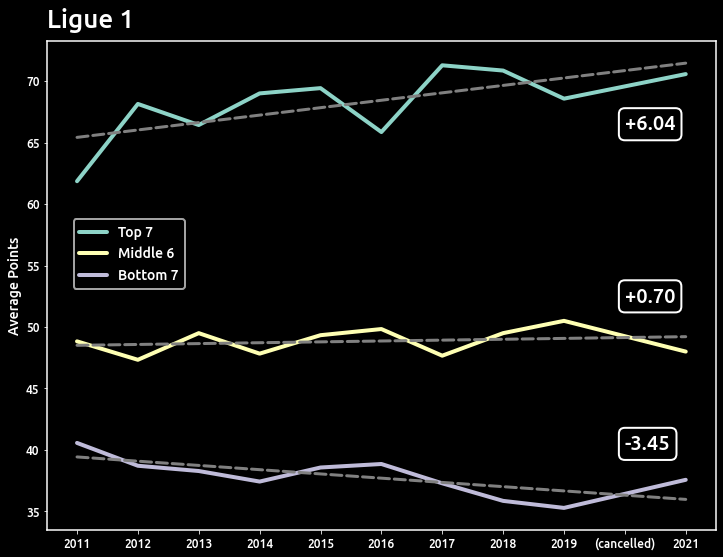

In [ ]:
lg = 'fra'
plot_league(lg, pt_avgs[lg], leagues[lg]['title'], x_skip=2020,
            txt_pos={'Top': 66, 'Middle': 52, 'Bottom': 40})

The Premier League had the highest average point gain of mid-table teams.

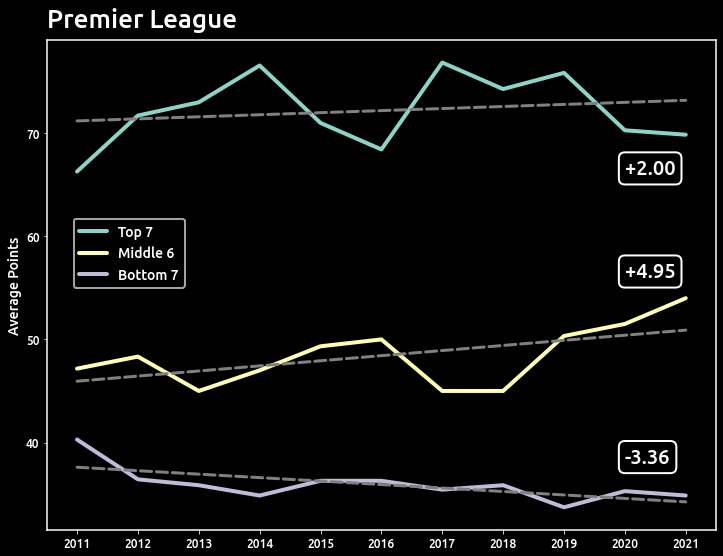

In [ ]:
lg = 'eng'
plot_league(lg, pt_avgs[lg], leagues[lg]['title'],
            txt_pos={'Top': 66, 'Middle': 56, 'Bottom': 38})


La Liga has been stable with the middle 6 teams making a small gain. But the lower 7 teams have lost the most amount of points of any league.

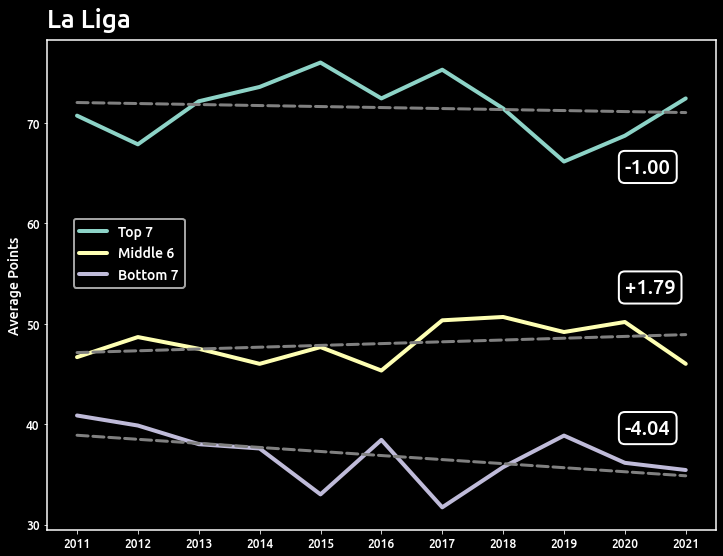

In [ ]:
lg = 'esp'
plot_league(lg, pt_avgs[lg], leagues[lg]['title'],
            txt_pos={'Top': 65, 'Middle': 53, 'Bottom': 39})


Serie A has out done Ligue 1 though, with the top 7 averaging nearly 8 more points over the last 10 seasons, taking points from both the middle and bottom 3rds.

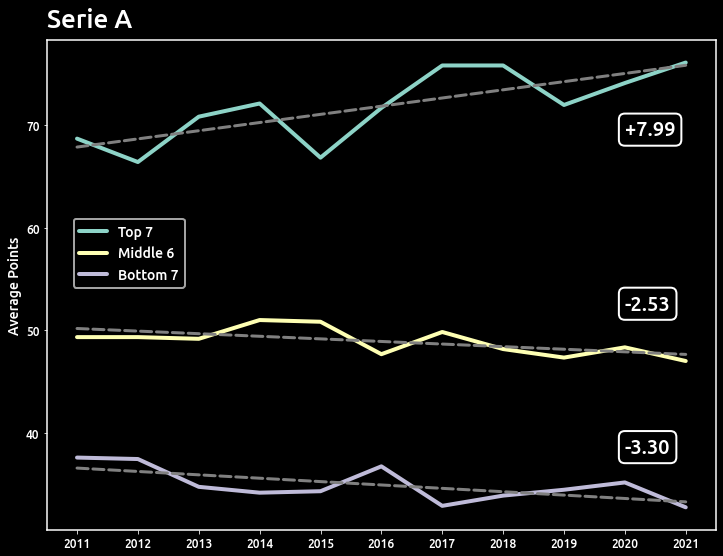

In [ ]:
lg = 'ita'
plot_league(lg, pt_avgs[lg], leagues[lg]['title'],
            txt_pos={'Top': 69, 'Middle': 52, 'Bottom': 38})


Bundesliga is stable, similar to La Liga, but had even less discrepancy between top and bottom. Interesting that the bottom 3rd of teams in every league has consistently lost points.

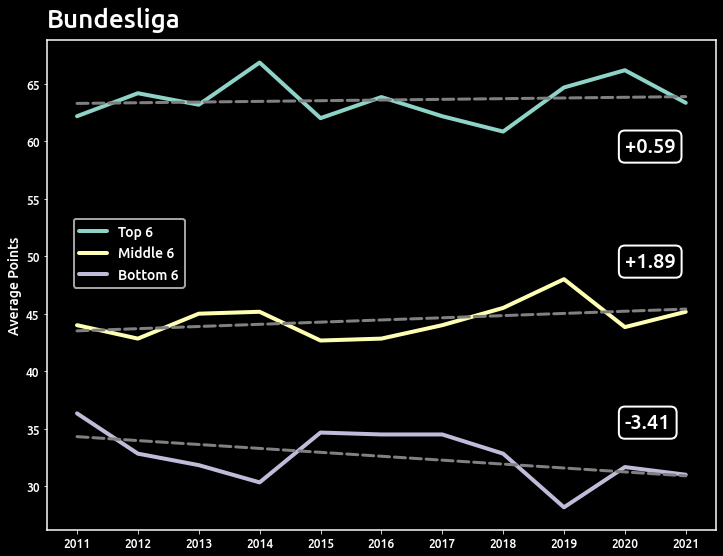

In [ ]:
lg = 'ger'
plot_league(lg, pt_avgs[lg], leagues[lg]['title'],
            txt_pos={'Top': 59, 'Middle': 49, 'Bottom': 35})
